# Pérez Sánchez Saúl

# Ciencias Espaciales, ENCiT

### Ejercicio 1

#### Con base en la presentación $Problemas$ $de$ $Calibración:$

#### Escriba una función que cree la matriz del sistema presentado en la página 6.
#### Realice el ejercicio que se describe en la página 9.

In [1]:
#Importaciones de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Consideraciones del modelo.
TA = 1.0
TB = 1.0
L = 1.0
S = 0.0
k = 1.0
N = 21

In [3]:
#Función para construir la matriz

def buildMatrix(N , d):
    M = np.zeros((N,N))
    
    for i in range(0,N-1):
        
        M[i+1,i]= -1
        M[i,i+1]= -1 
    
    for i in range(0,N):
        M[i,i]= 2 - d 
    
    return M

In [4]:
# Retomando la función definida en clase
def conduccion_1d(k, S, L, TA, TB, N, w):
    
    """
    Parameters
    ----------
    
    L: Float
    L es la longitud del dominio.
    
    k: Float
    k es la conductividad del material.
    
    S: Float
    S es la fuente.
    
    TA: Float
    TA es la condición de frontera a la izquierda.
    
    TB: Float
    TB es la condición de frontera a la derecha.
    
    N: Int
    N es el número de nodos internos (grados de libertad).
    
    w: float
    w es una constante.
    
    Return
    ------
    Perfil térmico.
    
    """
    
    h = L / (N + 1)
    r = k / h**2
    d = (w**2)/r #Término que se va a restar.

    T = np.zeros(N + 2) 
    b = np.zeros(N)
    A = buildMatrix(N , d) #Reconstrucción de la matriz.

    b[:] = S / r
    b[0] += TA
    b[-1] += TB

    T[0] = TA
    T[-1] = TB

    T[1:N+1] = np.linalg.solve(A,b) #Solución sistema
    
    x = [h * i for i in range(1, N + 1)]
    x.insert(0, 0)
    x.append(L)
    
    print('Los valores obtenidos de la temperatura fueron:')
    print('')
    print(T)
    plt.plot(x, T,'o-', color='black')
    plt.plot(x, T)
    plt.xlabel("$x$")
    plt.ylabel("$T$")
    plt.show()

Los valores obtenidos de la temperatura fueron:

[ 1.          1.30272968  1.43942855  1.39267454  1.16842639  0.79526416
  0.32074678 -0.19464927 -0.68523757 -1.08849344 -1.35302256 -1.44511112
 -1.35302256 -1.08849344 -0.68523757 -0.19464927  0.32074678  0.79526416
  1.16842639  1.39267454  1.43942855  1.30272968  1.        ]


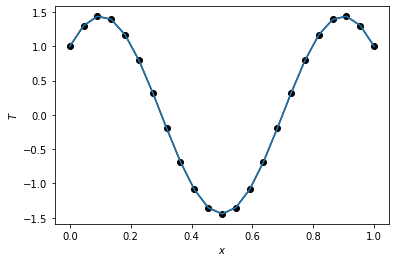

In [5]:
#Definiendo un valor para el parámetro w:
w = 2.5*np.pi

#Incovamos la función.

conduccion_1d(k, S, L, TA, TB, N, w)

In [6]:
#Implementación para la solución exacta
def solExact(x , w):
    x = np.array(x)
    return ((1.0 - np.cos(w))/np.sin(w)) * np.sin(w * x) + np.cos(w * x)

In [7]:
#Redefinimos la función anterior
def conduccion_1d_solExact(k, S, L, TA, TB, N, w):
    
    """
    Parameters
    ----------
    
    L: Float
    L es la longitud del dominio.
    
    k: Float
    k es la conductividad del material.
    
    S: Float
    S es la fuente.
    
    TA: Float
    TA es la condición de frontera a la izquierda.
    
    TB: Float
    TB es la condición de frontera a la derecha.
    
    N: Int
    N es el número de nodos internos (grados de libertad).
    
    w: float
    w es una constante.
    
    Return
    ------
    Perfil térmico redefinido.
    
    """
    
    h = L / (N + 1)
    r = k / h**2
    d = (w**2)/r #Término que se va a restar.

    T = np.zeros(N + 2) 
    b = np.zeros(N)
    A = buildMatrix(N , d) #Reconstrucción de la matriz.

    b[:] = S / r
    b[0] += TA
    b[-1] += TB

    T[0] = TA
    T[-1] = TB

    T[1:N+1] = np.linalg.solve(A,b) #Solución sistema
    
    x = [h * i for i in range(1, N + 1)]
    x.insert(0, 0)
    x.append(L)
    
    Error = np.linalg.norm(solExact(x,w)-T,2) #Norma L -2 del error absoluto
    
    plt.title(r'Ecuación: $\frac{\partial^2u(x)}{\partial x^2}$ = $\omega^2$u(x); u(a)=u(b)=1')
    plt.plot(x, solExact(x , w), 
             color='red', 
             label = r'Sol. Analítica: $u(x) = \frac{1 - cos(\omega)}{sin(\omega)}$sin($\omega$x) + cos($\omega$x)')
    plt.plot(x, T, marker='o', 
             color='blue', 
             linestyle='None',
             label = f'Sol. Numérica: E(h = {round(h, 7)}) = {round(Error, 4)}')
    plt.xlabel("$x$")
    plt.ylabel("$T$")
    plt.legend(loc='best', bbox_to_anchor=(1.1, 0.9))
    plt.show()

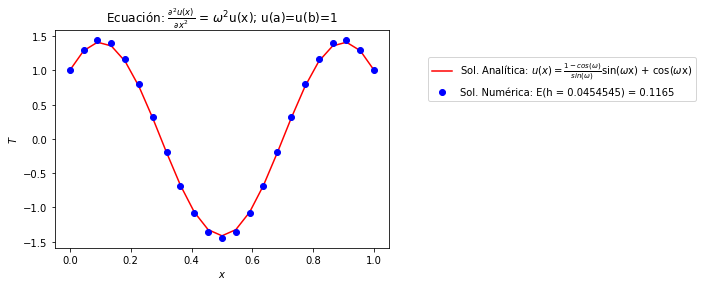

In [8]:
conduccion_1d_solExact(k, S, L, TA, TB, N, w)

### Ejercicio 2.

#### Con base en la presentación $Introducción$ $al$ $Método$ $de$ $Diferencias$ $Finitas:$

#### Realice el ejercicio 1.3
#### Realice el ejercicio 1.4

### Ejercicio 1.3
#### Calcular los coeficiente de la aproximación $D_{3}f(x) = Af_{i+1} + B_{fi} + C_{fi−1} + D_{fi−2}$ y demostrar que el orden de esta aproximación es $O(h^3)$

Expandemos la función en series de Taylor, respecto al punto $x_i$:

$f_{i+1} = f_i + hf'_i + \frac{h^2}{2!}f''_i + \frac{h^3}{3!}f'''_i + O(h^4)$

$f_{i-1} = f_i + (-h)f'_i + \frac{(-h)^2}{2!}f''_i + \frac{(-h)^3}{3!}f'''_i + O(h^4)$

$f_{i-2} = f_i + (-2h)f'_i + \frac{(-2h)^2}{2!}f''_i + \frac{(-2h)^3}{3!}f'''_i + O(h^4)$


Simplificando:

$f_{i+1} = f_i + hf'_i + \frac{h^2}{2}f''_i + \frac{h^3}{6}f'''_i + O(h^4)$

$f_{i-1} = f_i - hf'_i + \frac{h^2}{2}f''_i - \frac{h^3}{6}f'''_i + O(h^4)$

$f_{i-2} = f_i - 2hf'_i + 2h^2f''_i - \frac{4}{3}h^3f'''_i + O(h^4)$

Sustituyendo en $D_3f(x)$:


$D_3f(x) = A ( f_i + hf'_i + \frac{h^2}{2}f''_i + \frac{h^3}{6}f'''_i + O(h^4))$

$+ B f_i$ 

$+ C ( f_i - hf'_i + \frac{h^2}{2}f''_i - \frac{h^3}{6}f'''_i + O(h^4))$

$+ D ( f_i - 2hf'_i + 2h^2f''_i - \frac{4}{3}h^3f'''_i + O(h^4))$



Agrupando:

$D_3f(x) = ( A + B + C + D) f_i$

$+ ( A - C - 2D)f'_ih$

$+ ( \frac{A}{2} + \frac{C}{2} + 2D)f''_ih^2$

$+ ( \frac{A}{6} - \frac{C}{6} - \frac{4D}{3})f'''_ih^3$

$+ O(h^4) $



Para resolver el sistema de ecuaciones, planteamos la siguiente matriz:

$
\left(
\begin{matrix}
1 & 1 & 1 & 1 \\
1 & 0 & -1 & -2 \\
\frac{1}{2} & 0 & \frac{1}{2} & 2 \\
\frac{1}{6} & 0 & -\frac{1}{6} & -\frac{4}{3} \\
\end{matrix}
\right)
\left(
\begin{matrix}
A \\
B \\
C \\
D \\
\end{matrix}
\right)
=
\left(
\begin{matrix}
0 \\
\frac{1}{h} \\
0 \\
0 \\
\end{matrix}
\right)
$



Resolviendo el sistema de ecuaciones:
$A = \frac{1}{3h}$
$B = \frac{1}{2h}$
$C = -\frac{1}{h}$ 
$D = \frac{1}{6h}$

Sustituyendo en $D_3f(x) = Af_{i+1}+ Bf_i + Cf_{i-1} + Df_{i-2}$:

$D_3f(x) = \frac{1}{3h}f_{i+1}+ \frac{1}{2h}f_i + -\frac{1}{h}f_{i-1} + \frac{1}{6h}f_{i-2}$

$ = \frac{2f_{i+1} + 3f_i - 6f_{i-1} + f_{i-2}}{6h}$

$ = \dfrac{1}{6 h} \left( 2f_{i+1} + 3f_{i} - 6f_{i-1} + f_{i-2} \right)$

Observe que hemos llamado al resultado $D_3f(x_i)$ que indica que se usan dos puntos a la izquierda de $x_i$ y uno a la derecha de $x_i$. Por lo tanto, el orden de esta aproximación es $O(h^3)$.

### Ejercicio 1.4
#### Reproducir la tabla y la gráfica del ejemplo 3

Sea $u(x) = sin(x)$, (1) Aproximar $u'(x) = cos(x)$ en $x_o = 1$, es decir $cos(1) ≈ 0.5403$, usando $D_−$, $D_+$, $D_0$, $D_{−2}$, $D_{+2}$ y $D_3 = \frac{1}{6h}[2u_{i+1} + 3u_i − 6u_{i−1} + u_{i−2}]$ y calcular el error absoluto: $|cos(1) − D_i|$ para $i = −, +, 0, −2, +2, 3.$

In [9]:
# Basado en el notebook visto en clase "02_cla_derivadas_numericas",


# Definimos diferencias finitas hacia atras, D_:

def backwardFD(u,x,h):
    return (u(x)-u(x-h))/h

# Definimos diferencias finitas hacia adelante, D+:
def forwardFD(u,x,h):
    return (u(x+h)-u(x))/h

# Definimos diferencias finitas centradas:
def centeredFD(u,x,h):
    return (u(x+h)-u(x-h))/(2*h)

# Definimos diferencias finitas con tres puntos hacia la izquierda:
def D2l(u,x,h):
    return (3*u(x)-4*u(x-h)+u(x-2*h))/(2*h)

# Definimos diferencias finitas con tres puntos hacia la derecha:
def D2r(u,x,h):
    return (-3*u(x) +4*u(x+h) - u(x+2*h)) / (2*h)

# Definimos diferencias finitas con dos pasos a la izquierda y uno a la derecha:
def D3(u,x,h):
    return (2*u(x+h) + 3*u(x)- 6*u(x-h) + u(x-2*h)) / (6*h)

In [10]:
# Definimos los parámetros
u = np.sin
h = np.array([0.100, 0.050, 0.010, 0.005, 0.001])
x = np.ones(5)

In [11]:
# Calculamos el error entre la derivada exacta y la derivada numérica, de cada aproximación

#Diferencias finitas hacia atrás:
eb = np.fabs(np.cos(x) - backwardFD(u,x,h))

#Diferencias finitas hacia adelante:
ef = np.fabs(np.cos(x) - forwardFD(u,x,h))

#Diferencias finitas centradas:
ec = np.fabs(np.cos(x) - centeredFD(u,x,h))

#Diferencias finitas con tres puntos hacia la izquierda:
e2l = np.fabs(np.cos(x) - D2l(u,x,h))

#Diferencias finitas con tres puntos hacia la derecha:
e2r = np.fabs(np.cos(x) - D2r(u,x,h))

#Diferencias finitas un punto hacia adelante y dos puntos hacia atrás:
e3 = np.fabs( np.cos(x) - D3(u,x,h))

In [12]:
# Metemos la información en un Dataframe y mostramos el resultado:

Error = pd.DataFrame(np.array([h,ef,eb,ec,e2l,e2r,e3]).transpose(), 
                     columns=['$h$','$D_-$','$D_+$','$D_0$','$D_{-2}$','$D_{+2}$', '$D_3$'])
Error

,$h$,$D_-$,$D_+$,$D_0$,$D_{-2}$,$D_{+2}$,$D_3$
0,0.100,0.042939,0.041138,9.000537e-04,2.004728e-03,1.584693e-03,6.820693e-05
1,0.050,0.021257,0.020807,2.250978e-04,4.761431e-04,4.235730e-04,8.649142e-06
2,0.010,0.004216,0.004198,9.004993e-06,1.821981e-05,1.779908e-05,6.994130e-08
3,0.005,0.002106,0.002101,2.251257e-06,4.528776e-06,4.476184e-06,8.754000e-09
4,0.001,0.000421,0.000421,9.005045e-08,1.803108e-07,1.798903e-07,6.997947e-11


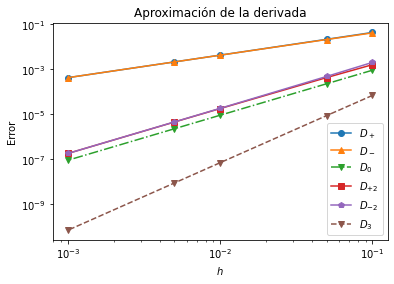

In [13]:
#Gráfica
plt.plot(h, ef, 'o-', label='$D_+$')
plt.plot(h, eb, '^-', label='$D_-$')
plt.plot(h, ec, 'v-.', label='$D_0$')
plt.plot(h, e2r, 's-', label='$D_{+2}$')
plt.plot(h, e2l, 'p-', label='$D_{-2}$')
plt.plot(h, e3, 'v--', label='$D_3$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()